In [ ]:
import requests
import zipfile
import io
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression  # Using Logistic Regression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Downloading and loading data
zip_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'
response = requests.get(zip_url)
if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content)) as thezip:
        with thezip.open('student-por.csv') as myfile:
            df_por = pd.read_csv(myfile, sep=';')
        with thezip.open('student-mat.csv') as myfile:
            df_mat = pd.read_csv(myfile, sep=';')
    df = pd.concat([df_por, df_mat], axis=0)
else:
    print("Failed to download the file")


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]
               age         Medu         Fedu   traveltime    studytime  \
count  1044.00

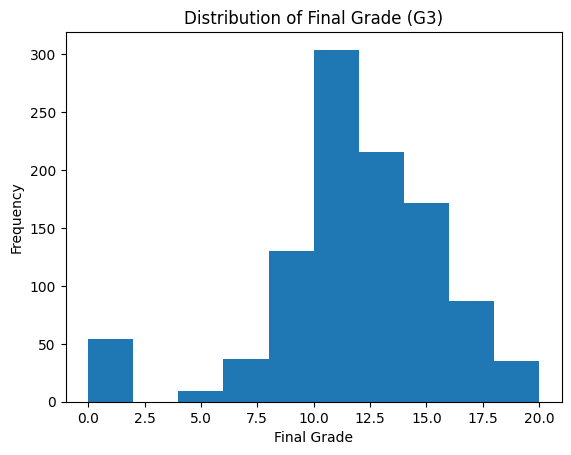

In [ ]:
#ADD EDA steps
# Display first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Data type information
print(df.info())

# Distribution of the target variable 'G3'
plt.hist(df['G3'])
plt.title('Distribution of Final Grade (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Discretizing the 'G3' variable for classification
threshold = 8
df['G3'] = (df['G3'] >= threshold).astype(int)

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)  # For numeric columns
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)  # For categorical columns

# Encode binary categorical variables using LabelEncoder
binary_vars = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
               'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for var in binary_vars:
    le = LabelEncoder()
    df[var] = le.fit_transform(df[var])

# Encode nominal categorical variables using get_dummies
nominal_vars = ['Mjob', 'Fjob', 'reason', 'guardian']
df = pd.get_dummies(df, columns=nominal_vars, drop_first=True)

# Normalize numeric values
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('G3')
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [ ]:
# Preparing the data again
X = df.drop(['G3'], axis=1)
y = df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Model training using Random Forest
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9617224880382775
Confusion Matrix:
 [[ 14   7]
 [  1 187]]
